In [3]:
import csv
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
sns.set(rc={'axes.facecolor':'white'})
# sns.set_style("whitegrid")

In [5]:
b_data = []
for b in range(1, 6):
    file_path = "./building_"+str(b)+".csv"
    b_data.append(pd.read_csv(file_path))

In [6]:
w_data = []
for b in range(1, 6):
    file_path = "./weather_"+str(b)+".csv"
    w_data.append(pd.read_csv(file_path))

In [7]:
with open("./schema.json") as f:
    train_dict = json.load(f)
with open("./schema_eval.json") as f:
    test_dict = json.load(f)

In [4]:
b_data[0]

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,0.811782,0.0,0.0,0.0,0.000000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.102542,0.0,0.0,0.0,0.000000
2,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.099774,0.0,0.0,0.0,0.000000
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.099595,0.0,0.0,0.0,0.000000
4,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.092918,0.0,0.0,0.0,0.000000
5,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.111308,0.0,0.0,0.0,0.000000
6,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.299917,0.0,0.0,0.0,21.315836
7,1.0,7.0,0.0,0.0,0.0,0.0,0.0,1.307118,0.0,0.0,0.0,104.173152
8,1.0,8.0,0.0,0.0,0.0,0.0,0.0,1.308366,0.0,0.0,0.0,258.124408
9,1.0,9.0,0.0,0.0,0.0,0.0,0.0,0.315768,0.0,0.0,0.0,457.436849


In [25]:
fmri = sns.load_dataset("fmri")

In [26]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


In [8]:
def draw_graph(b1, b2, index):

    building1_name = "Building_"+str(b1+1)
    building2_name = "Building_"+str(b2+1)

    temp_random_1_b, temp_random_1_e = train_dict["buildings"][building1_name]["temp_random"]
    temp_random_2_b, temp_random_2_e = test_dict["buildings"][building2_name]["temp_random"]
    hum_random_1_b, hum_random_1_e = train_dict["buildings"][building1_name]["hum_random"]
    hum_random_2_b, hum_random_2_e = test_dict["buildings"][building2_name]["hum_random"]

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(temp_random_1_b, temp_random_1_e, 2):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(temp_random_2_b, temp_random_2_e, 2):
        temp_test.append(w_data[b2]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(hum_random_1_b, hum_random_1_e, 2):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(hum_random_2_b, hum_random_2_e, 2):
        hum_test.append(w_data[b2]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    solar_test_base = np.array(b_data[b2]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])
    demand_test_base = np.array(b_data[b2]["Equipment Electric Power [kWh]"])

    plot_demand_train = []
    plot_demand_test = []
    # day = np.array(list(range(0, 24)))

    solar_efficiency_tr = train_dict["buildings"][building1_name]["solar_efficiency"]
    solar_efficiency_te = test_dict["buildings"][building2_name]["solar_efficiency"]
    ac_efficiency_tr = train_dict["buildings"][building1_name]["ac_efficiency"]
    ac_efficiency_te = test_dict["buildings"][building2_name]["ac_efficiency"]
    # solar_intercept_tr = train_dict["buildings"][building1_name]["solar_intercept"]
    # solar_intercept_te = test_dict["buildings"][building2_name]["solar_intercept"]
    solar_panel_tr = train_dict["buildings"][building1_name]["solar_panel"]
    solar_panel_te = test_dict["buildings"][building2_name]["solar_panel"]

    if index == -1:     # solar
        # for temp_random in np.linspace(0, 20, 100):
        #     plot_demand_train.append((b_data[b1]["Solar Generation [W/kW]"]*i)/1000)
        # for j in np.linspace(4.0, 4.1, 100):
        #     plot_demand_test.append((b_data[b2]["Solar Generation [W/kW]"]*j)/1000)
        plot_demand_train = (temp_train*solar_efficiency_tr*solar_panel_tr**2) * solar_train_base / 1000
        plot_demand_test = (temp_test*solar_efficiency_te*solar_panel_te**2) * solar_test_base / 1000
    else:               # non shiftable demand
        # for i in np.linspace(0.1, 1, 100):
        #     plot_demand_train.append(b_data[b1]["Equipment Electric Power [kWh]"]+i)
        # for j in np.linspace(0, 0.1, 100):
        #     plot_demand_test.append(b_data[b2]["Equipment Electric Power [kWh]"]+j)
        plot_demand_train = (hum_train-60)/20/ac_efficiency_tr + (30-temp_train)/25/ac_efficiency_tr + demand_train_base
        plot_demand_test = (hum_test-60)/20/ac_efficiency_te + (30-temp_test)/25/ac_efficiency_te + demand_test_base

    plot_demand_train = np.array(plot_demand_train)
    plot_demand_test = np.array(plot_demand_test)

    df_train = pd.DataFrame()
    df_train["hour"] = list(range(0, 24)) * 2
    df_train["data"] = plot_demand_train.reshape(-1)

    df_test = pd.DataFrame()
    df_test["hour"] = list(range(0, 24)) * 2
    df_test["data"] = plot_demand_test.reshape(-1)

    # plt.plot(day, plot_demand_train[0], 'r--', label="Building "+str(b1+1)+" training")
    # for i in range(1, len(plot_demand_train)):
    #     plt.plot(day, plot_demand_train[i], 'r--')
    #     # print(plot_demand_train[i-4])

    # plt.plot(day, plot_demand_test[0], 'b--', label="Building "+str(b2+1)+" testing")
    # for i in range(1, len(plot_demand_test)):
    #     plt.plot(day, plot_demand_test[i], 'b--')
    # # plt.title("train_"+str(b1+1)+"_test_"+str(b2+1))

    sns.lineplot(x="hour", y="data", data=df_train, label="Building "+str(b1+1)+" training")
    sns.lineplot(x="hour", y="data", data=df_test, label="Building "+str(b2+1)+" testing")



    if index==-1:
        plt.title("Bldg. "+str(b1+1)+" tr & Bldg "+str(b2+1)+" te solar generation", fontsize = 20)
    else:
        plt.title("Bldg "+str(b1+1)+" tr & Bldg "+str(b2+1)+" te demand", fontsize = 20)

    plt.legend(loc="upper left", prop={'size': 10})
    plt.xlabel("hour")
    plt.show()

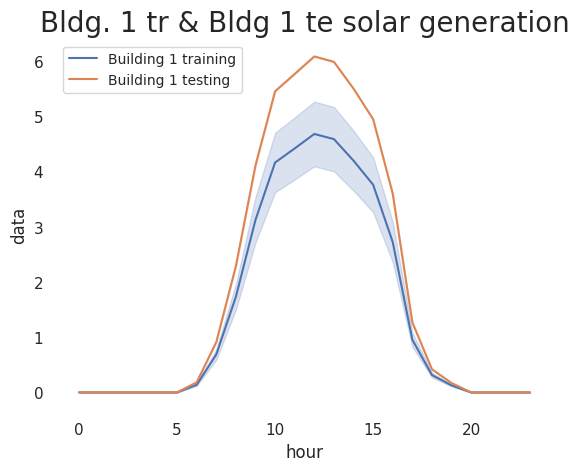

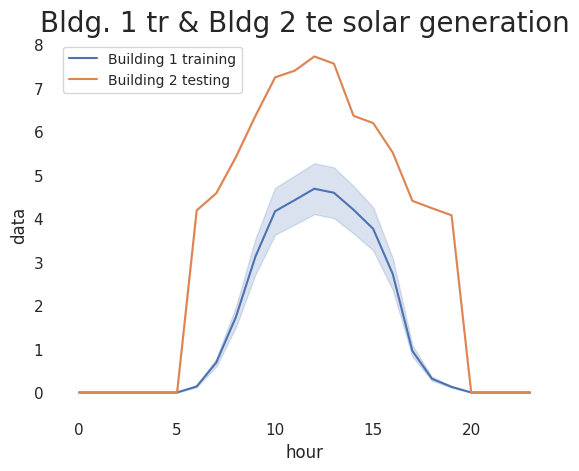

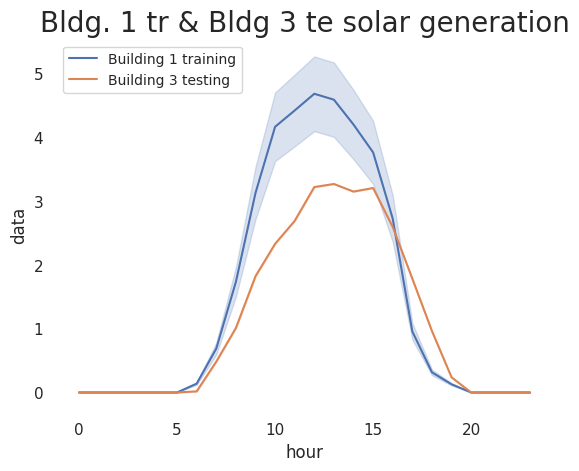

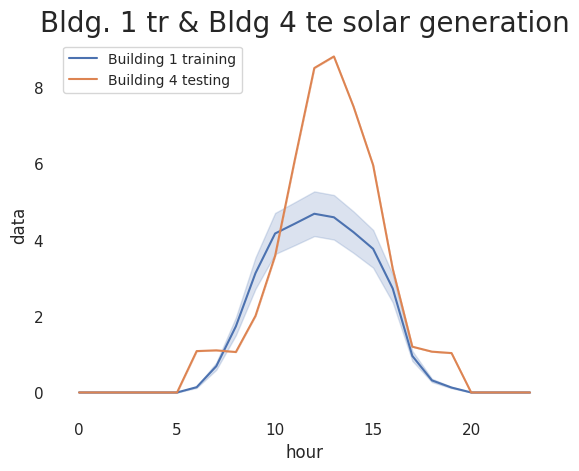

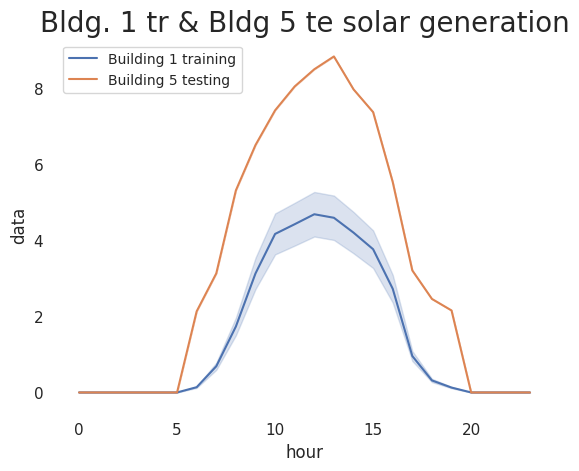

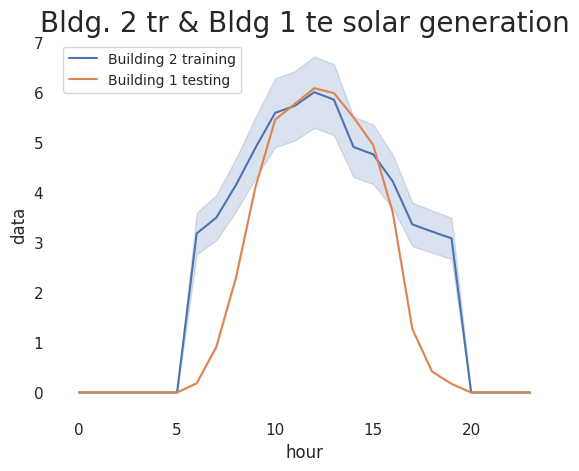

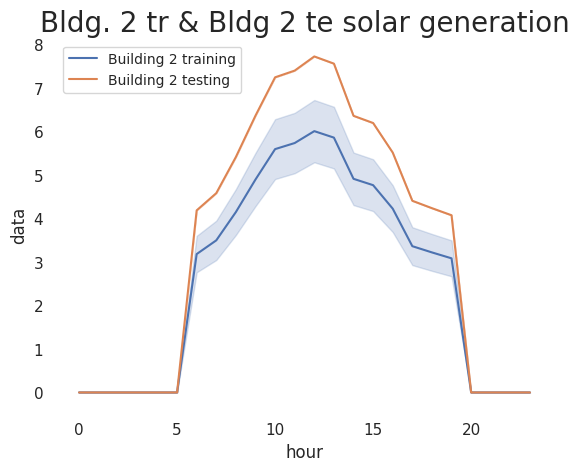

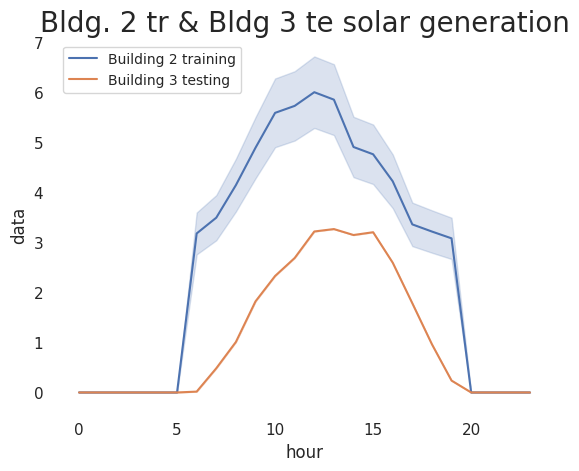

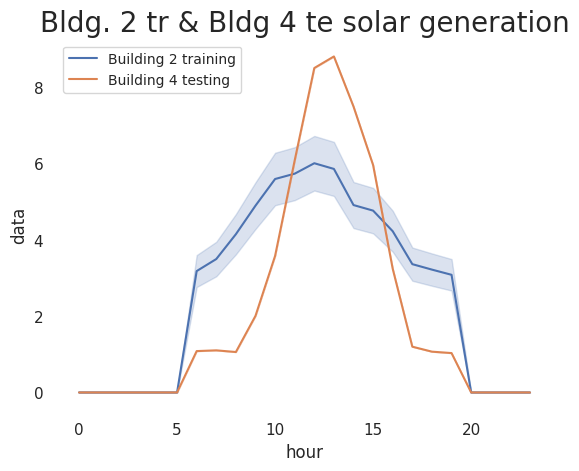

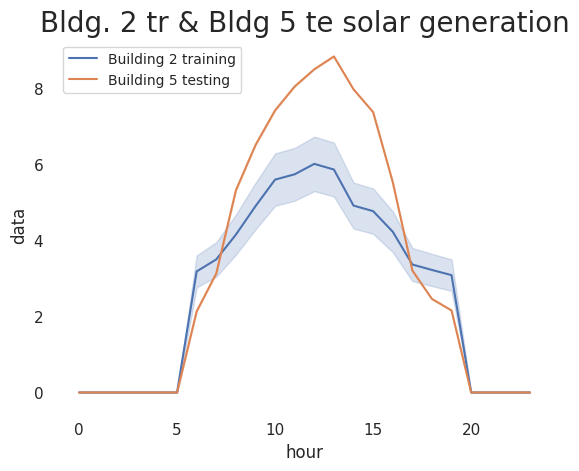

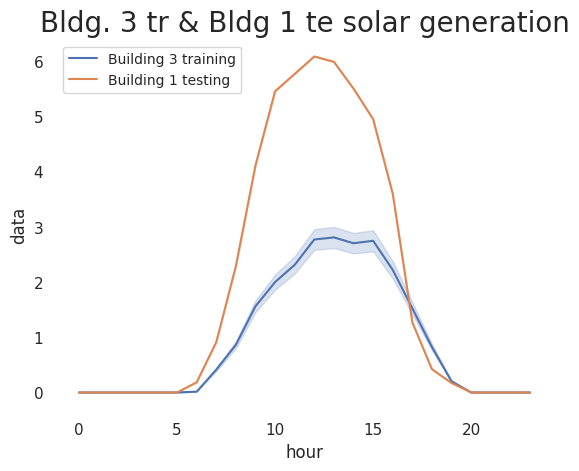

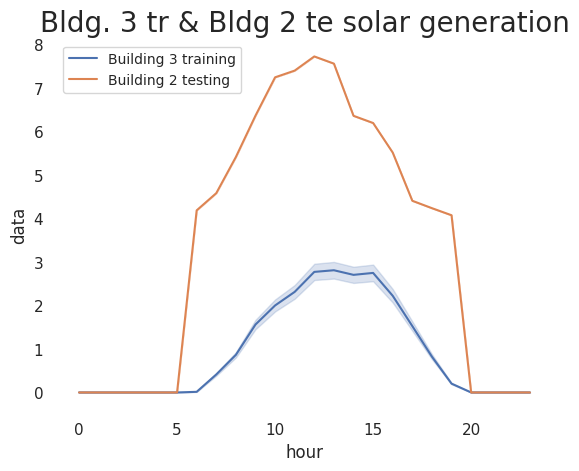

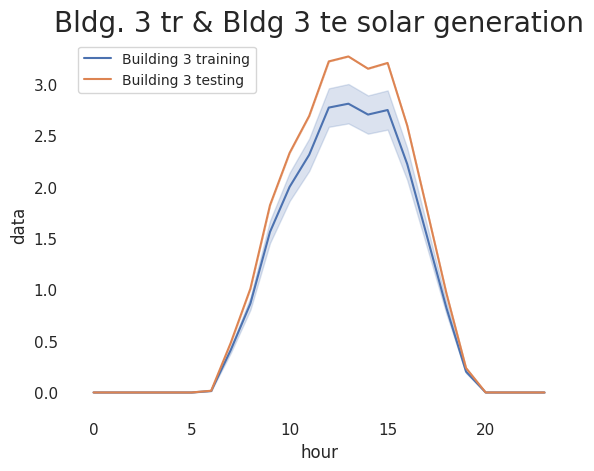

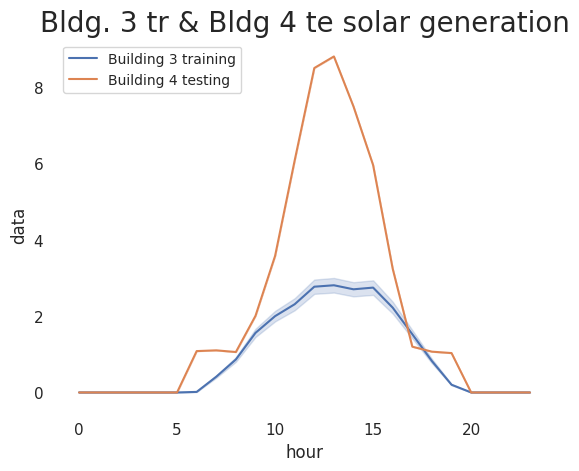

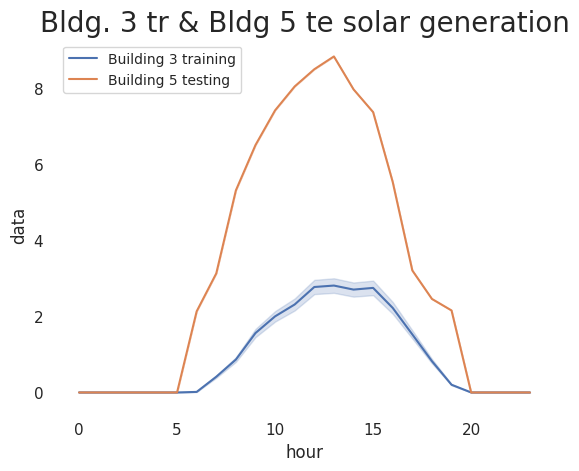

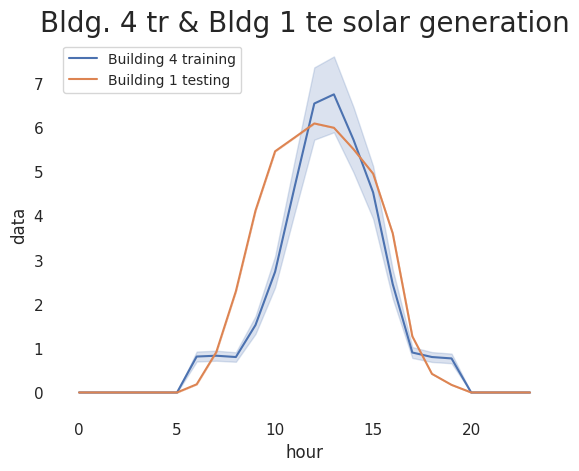

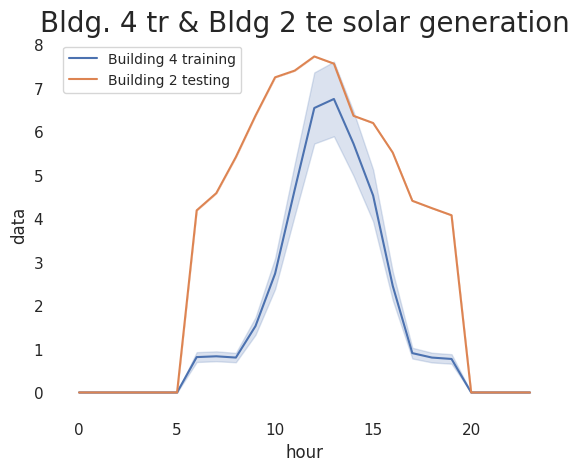

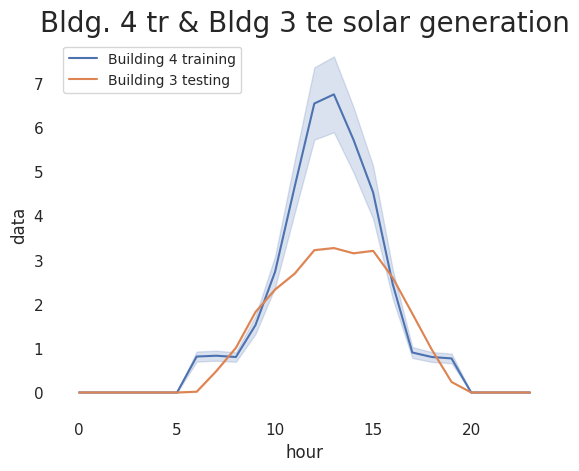

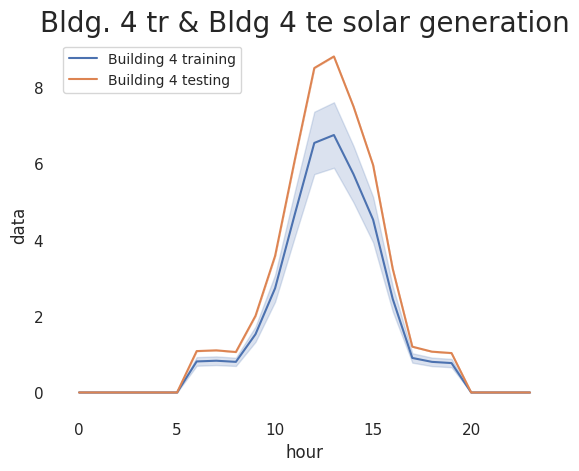

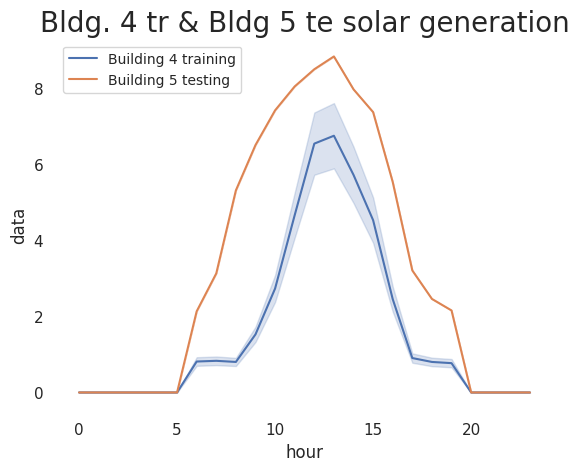

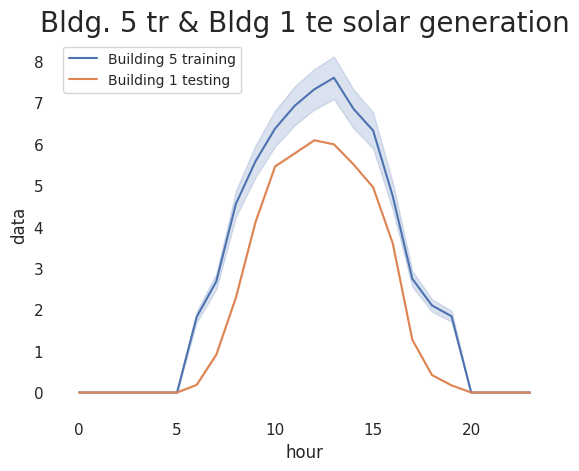

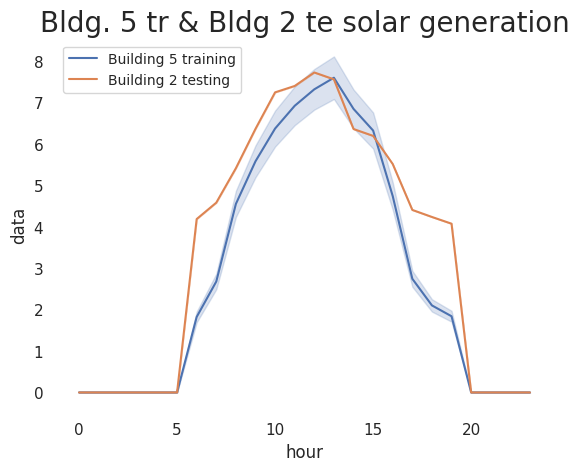

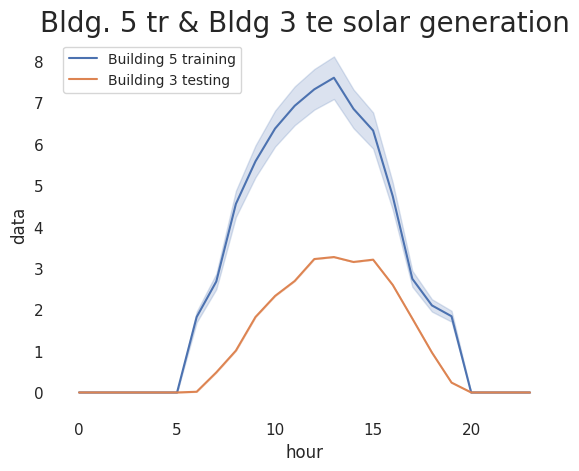

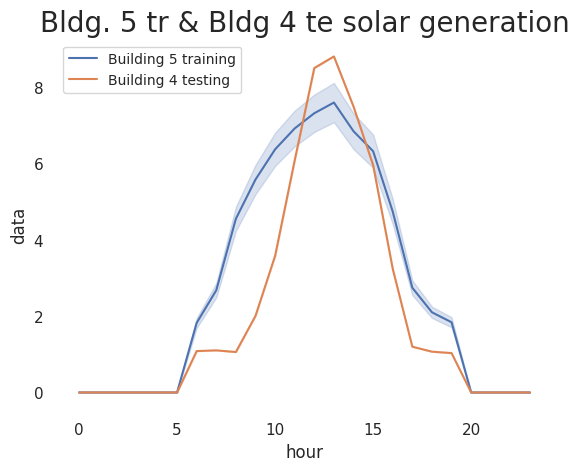

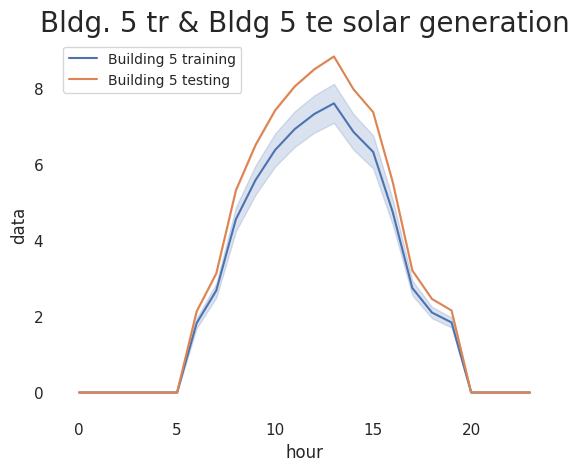

In [10]:
for i in range(5):
    for j in range(5):
        draw_graph(i, j, -1)    # solar generation

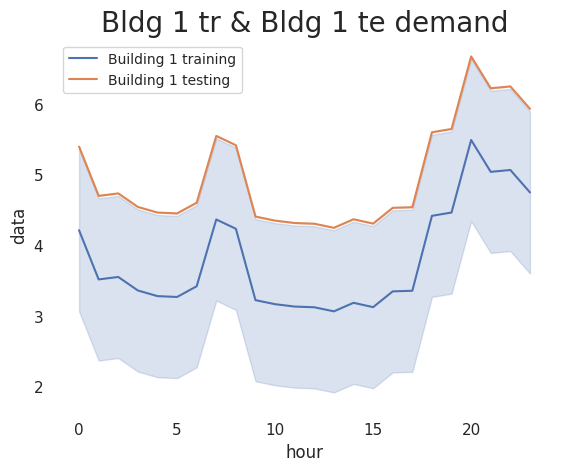

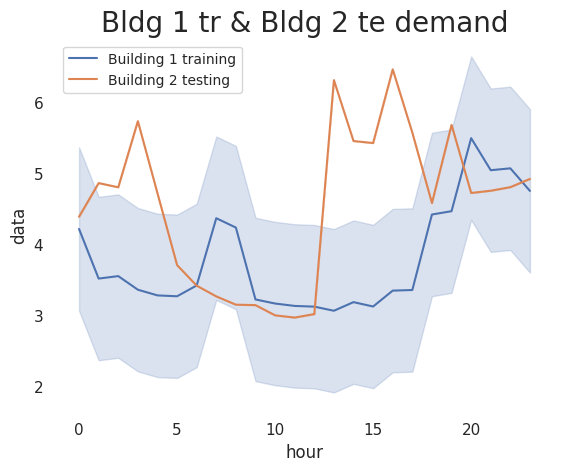

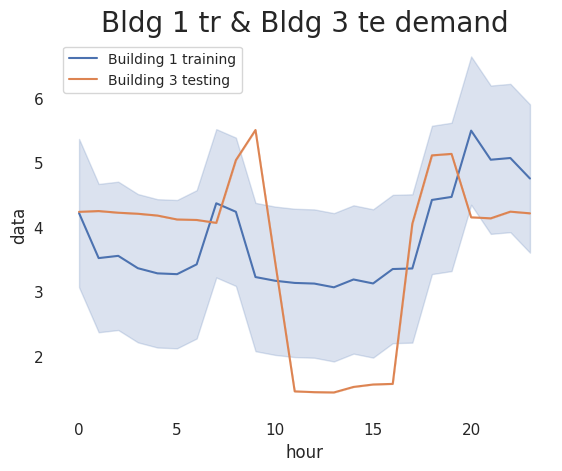

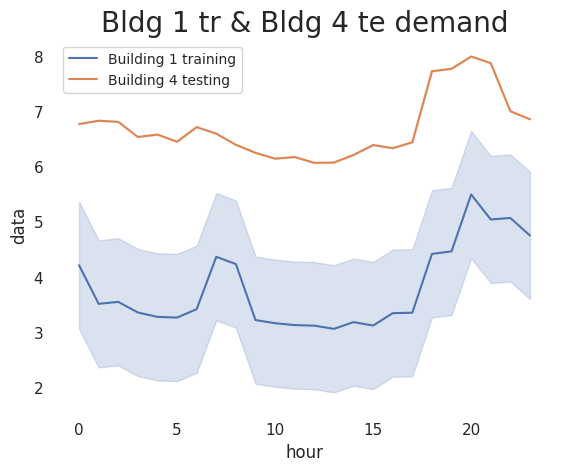

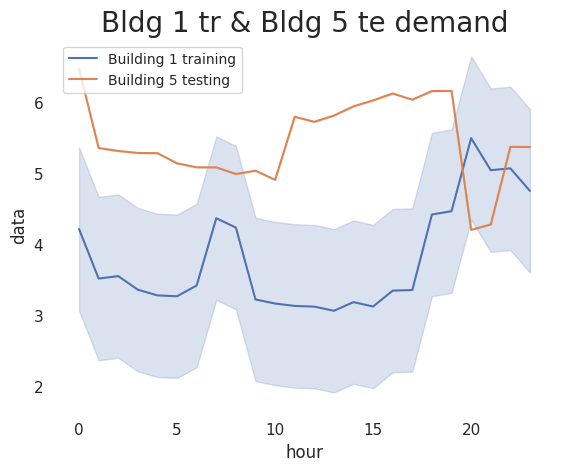

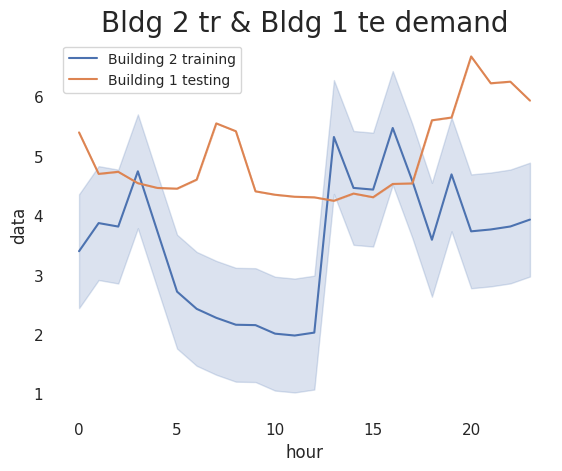

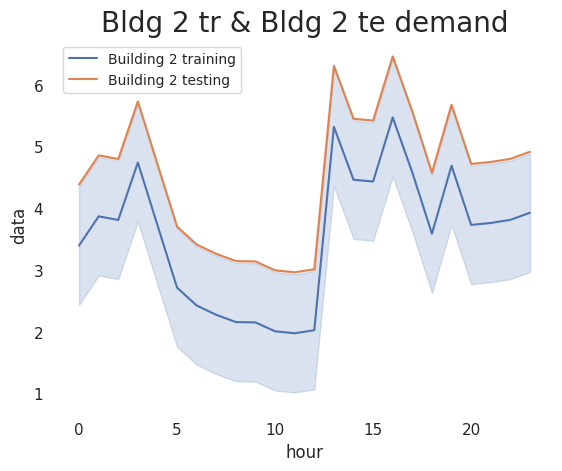

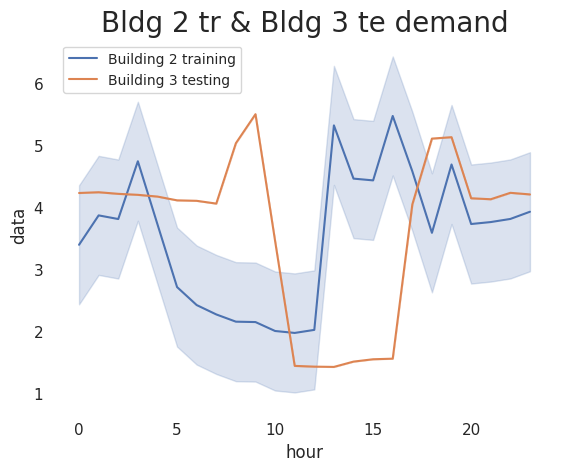

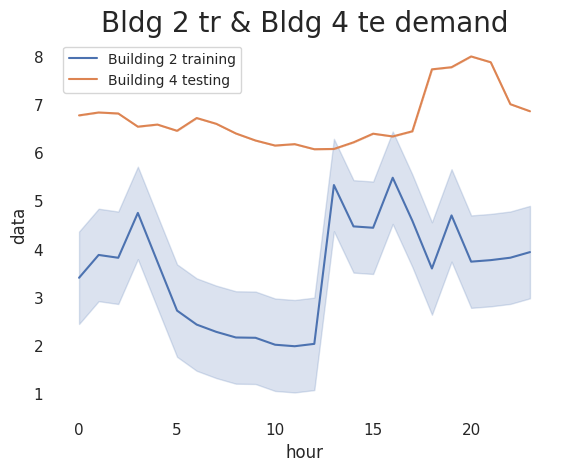

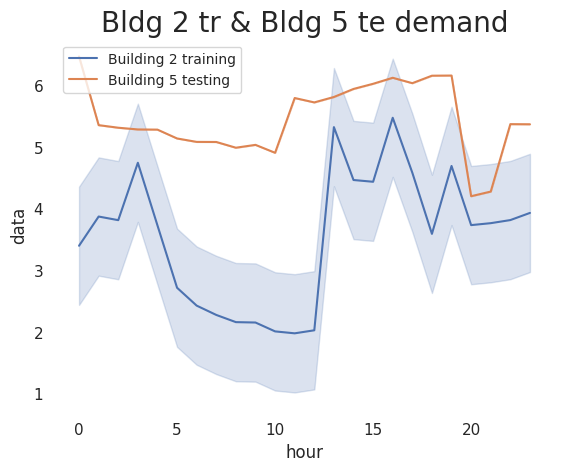

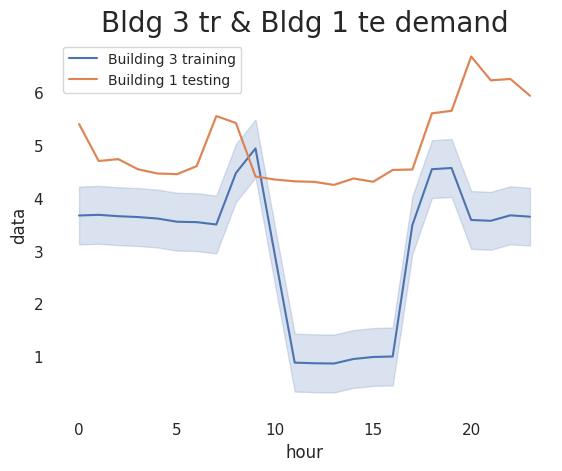

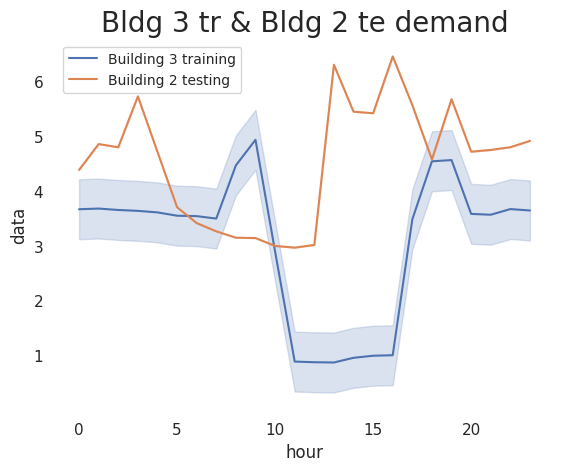

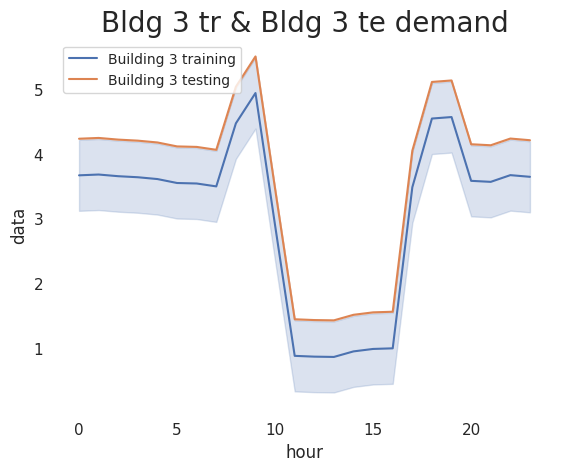

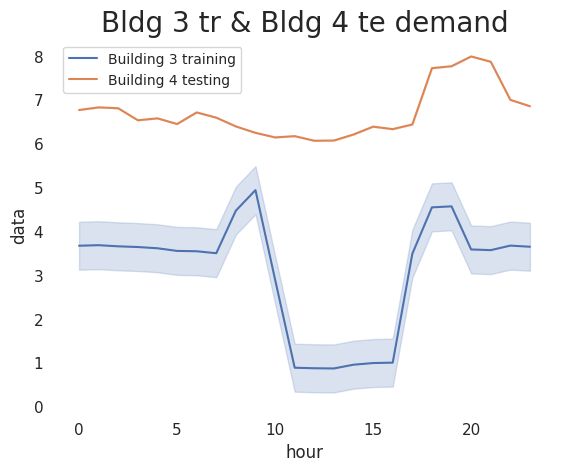

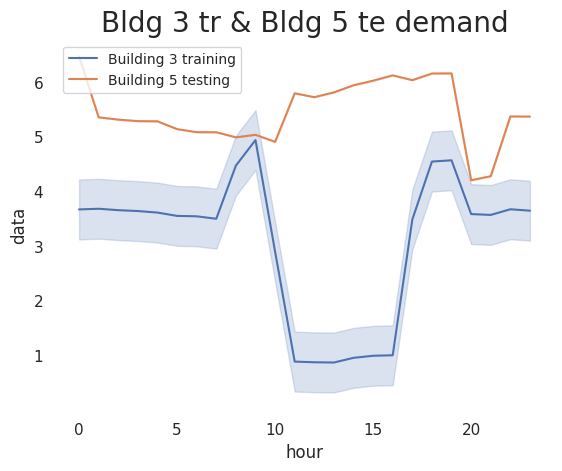

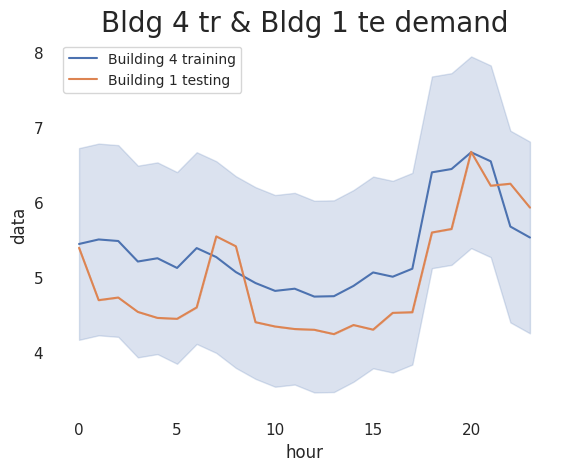

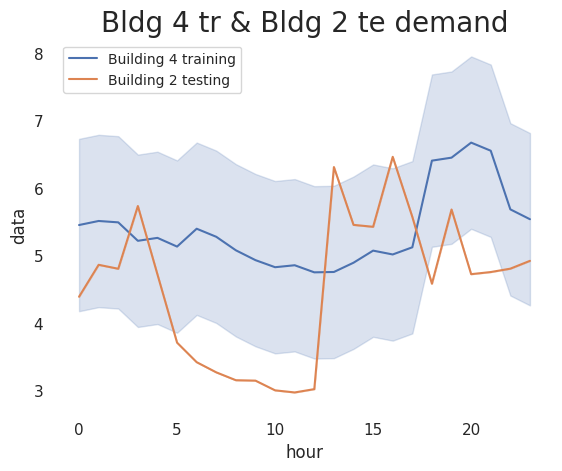

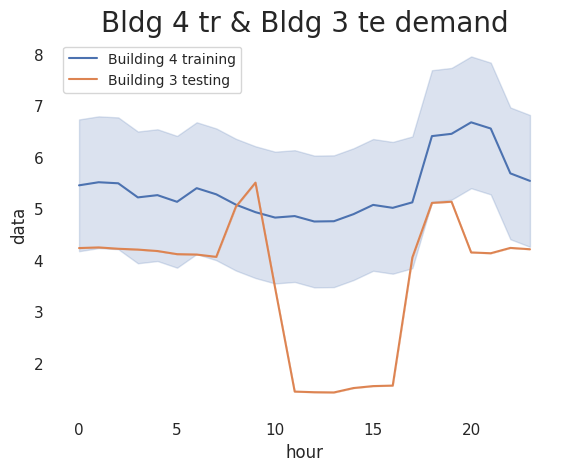

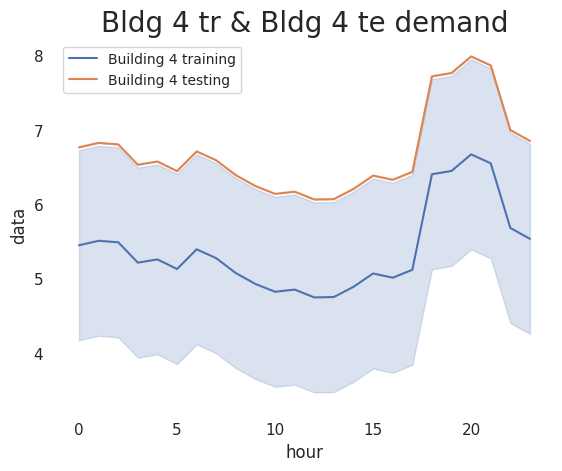

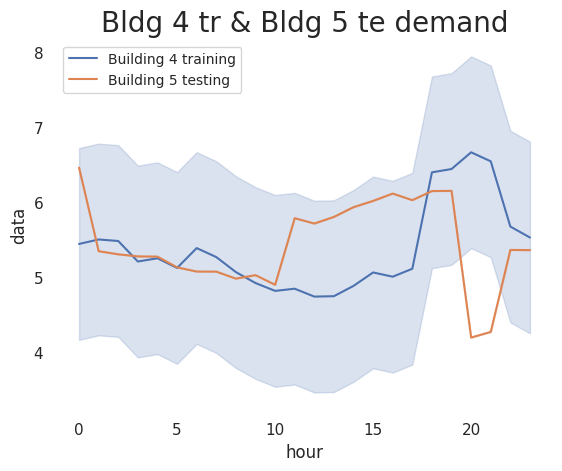

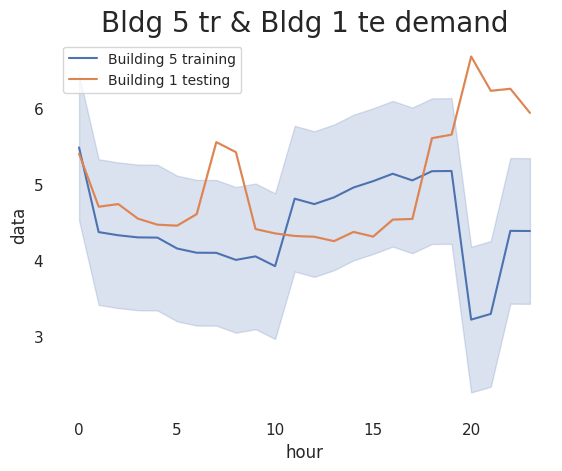

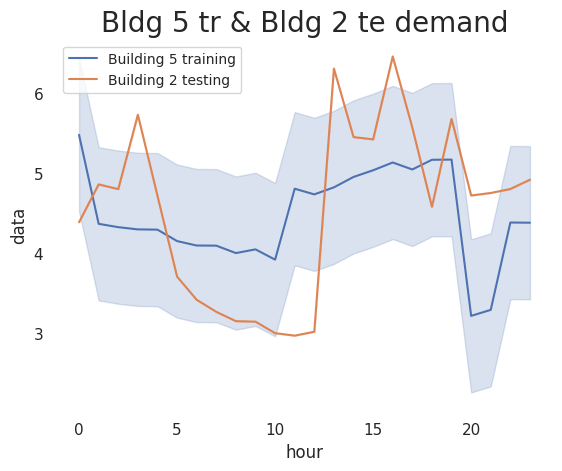

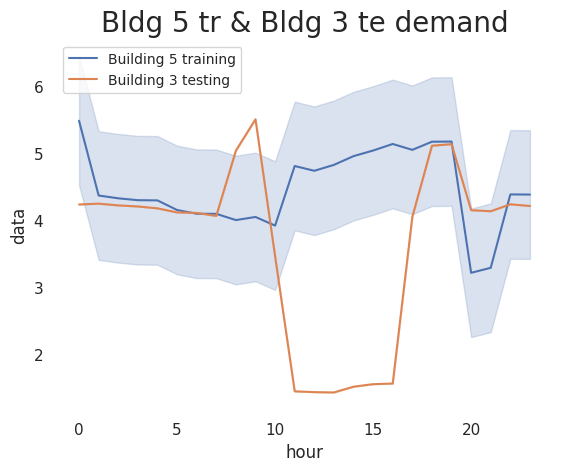

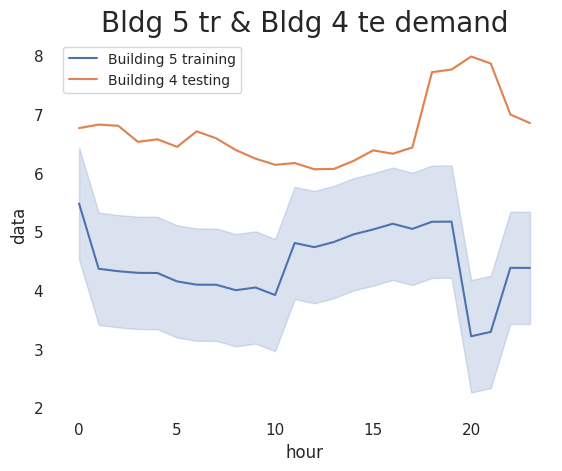

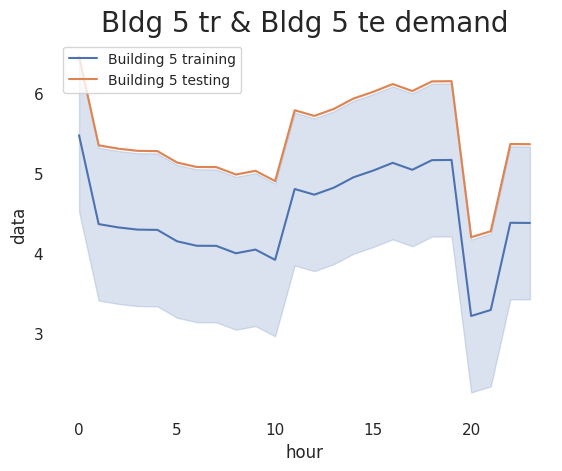

In [11]:
for i in range(5):
    for j in range(5):
        draw_graph(i, j, -5)    # demand

In [12]:
def draw_solar_demand(b1):


    building1_name = "Building_"+str(b1+1)

    temp_random_1_b, temp_random_1_e = train_dict["buildings"][building1_name]["temp_random"]
    temp_random_2_b, temp_random_2_e = test_dict["buildings"][building1_name]["temp_random"]
    hum_random_1_b, hum_random_1_e = train_dict["buildings"][building1_name]["hum_random"]
    hum_random_2_b, hum_random_2_e = test_dict["buildings"][building1_name]["hum_random"]

    temp_train = []
    temp_test = []
    hum_train = []
    hum_test = []
    for temp_random in np.linspace(temp_random_1_b, temp_random_1_e, 10):
        temp_train.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for temp_random in np.linspace(temp_random_2_b, temp_random_2_e, 10):
        temp_test.append(w_data[b1]["Outdoor Drybulb Temperature [C]"] + temp_random)
    for hum_random in np.linspace(hum_random_1_b, hum_random_1_e, 10):
        hum_train.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    for hum_random in np.linspace(hum_random_2_b, hum_random_2_e, 10):
        hum_test.append(w_data[b1]["Relative Humidity [%]"] + hum_random)
    temp_train = np.array(temp_train)
    temp_test = np.array(temp_test)
    hum_train = np.array(hum_train)
    hum_test = np.array(hum_test)

    solar_train_base = np.array(b_data[b1]["Solar Generation [W/kW]"])
    demand_train_base = np.array(b_data[b1]["Equipment Electric Power [kWh]"])

    plot_demand_train = []
    plot_demand_test = []
    day = np.array(list(range(0, 24)))

    solar_efficiency_tr = train_dict["buildings"][building1_name]["solar_efficiency"]
    ac_efficiency_tr = train_dict["buildings"][building1_name]["ac_efficiency"]
    solar_panel_tr = train_dict["buildings"][building1_name]["solar_panel"]

    plot_solar_train = (temp_train*solar_efficiency_tr*solar_panel_tr**2) * solar_train_base / 1000
    plot_demand_train = (hum_train-60)/20/ac_efficiency_tr + (30-temp_train)/25/ac_efficiency_tr + demand_train_base

    for i in range(len(plot_solar_train)):
        plt.plot(day, plot_solar_train[i], 'r.')
        # print(plot_demand_train[i-4])
    for i in range(len(plot_demand_train)):
        plt.plot(day, plot_demand_train[i], 'b--')
    plt.title("train_"+str(b1+1)+"_test_"+str(b1+1))
    plt.show()

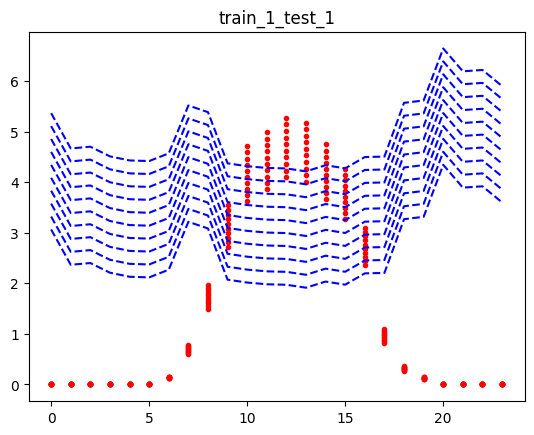

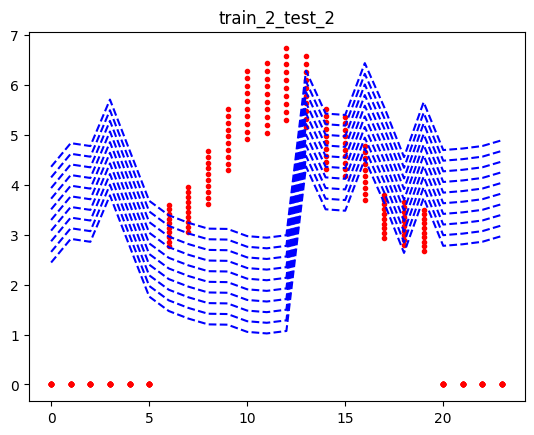

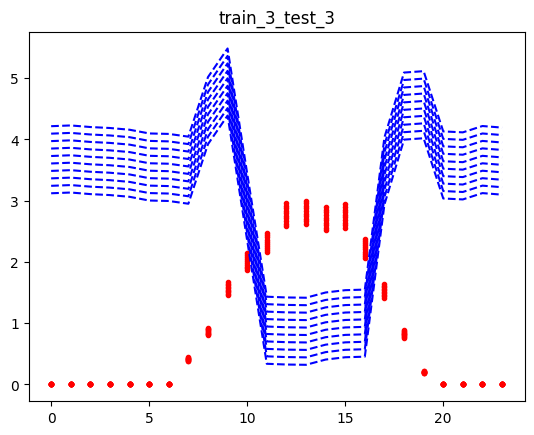

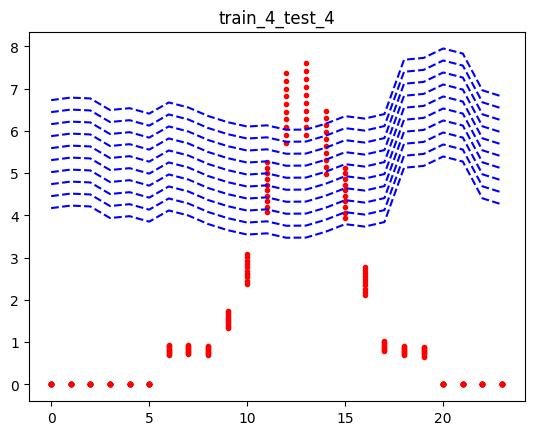

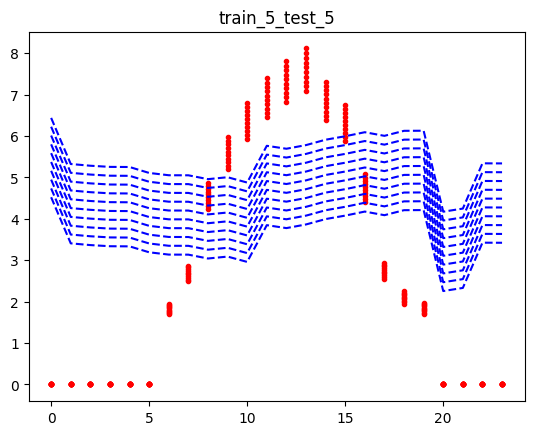

In [11]:
for i in range(5):
    draw_solar_demand(i)

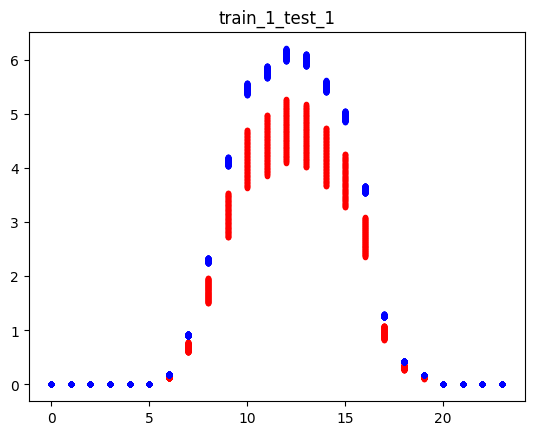

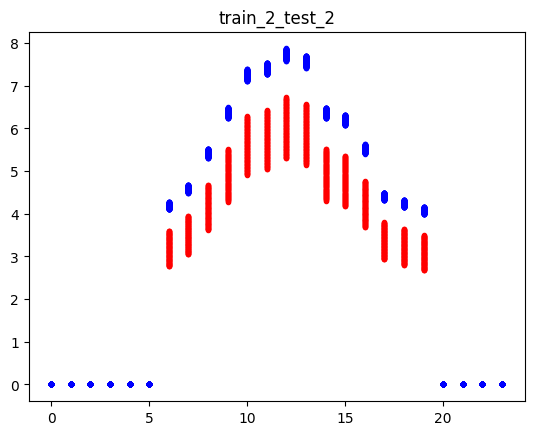

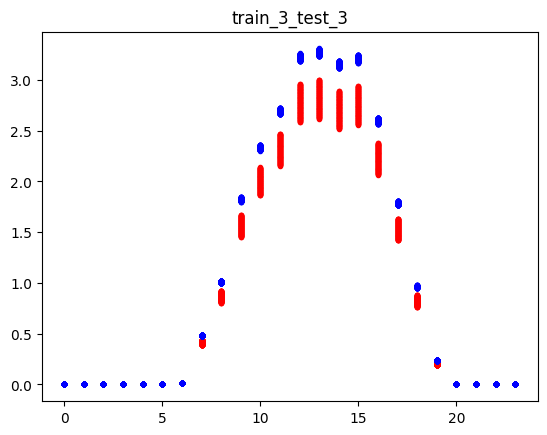

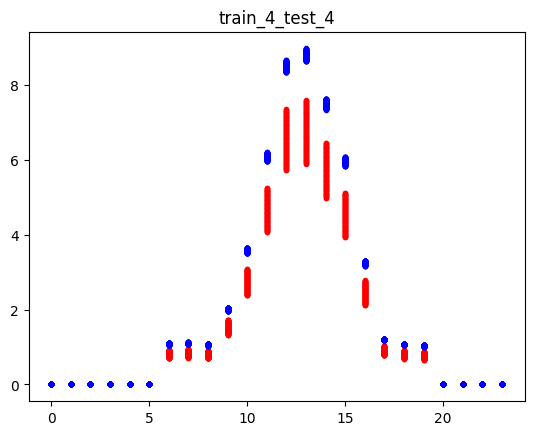

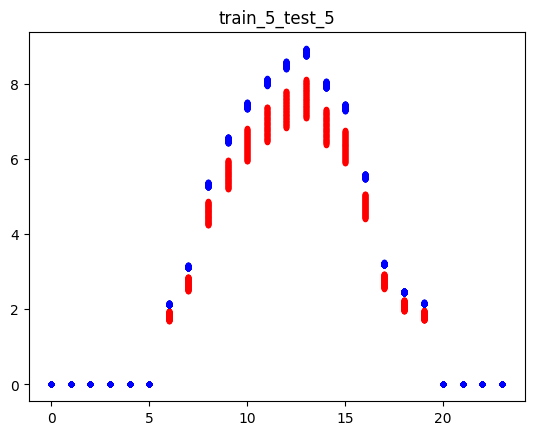

In [23]:
for i in range(5):
    draw_graph(i, i, -1)

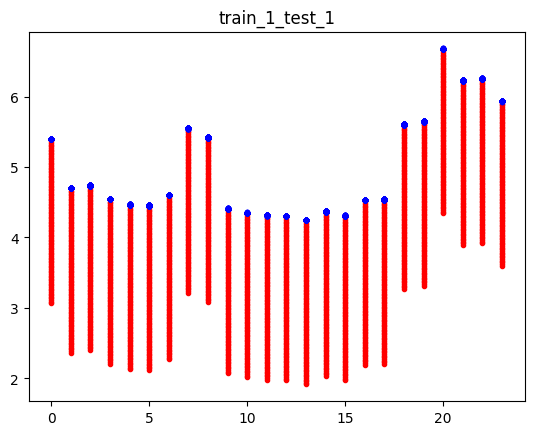

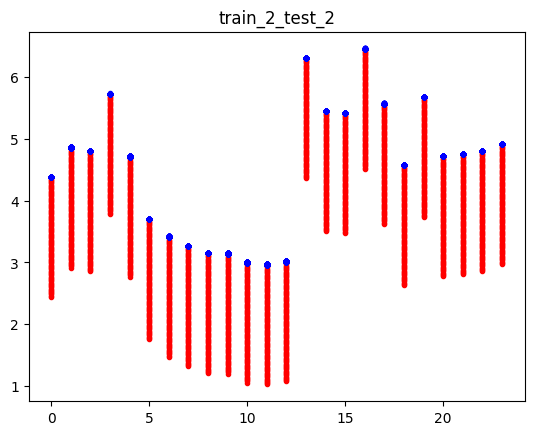

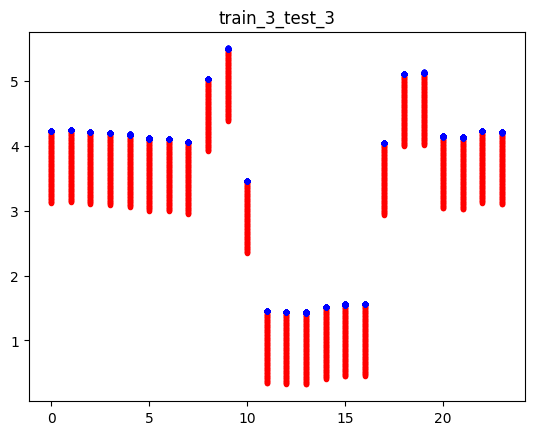

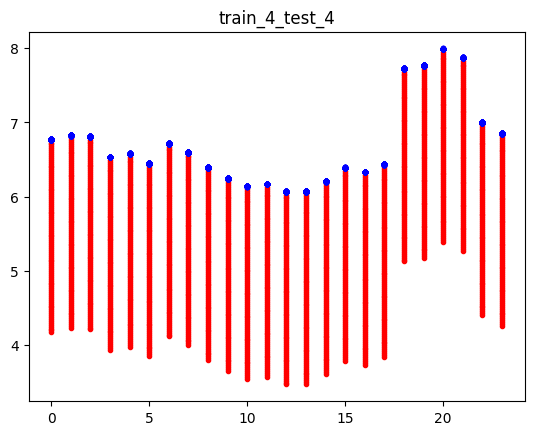

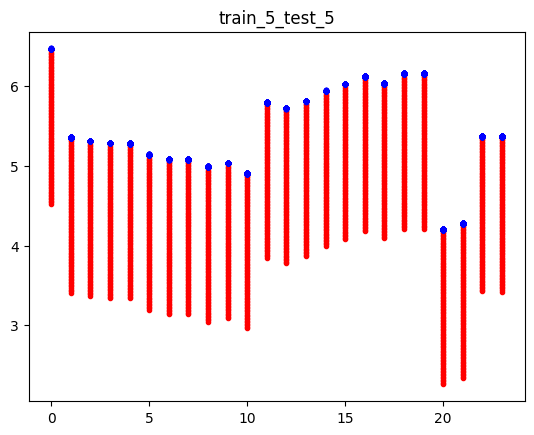

In [22]:
for i in range(5):
    draw_graph(i, i, -5)